# Combining Data - Combine & Update

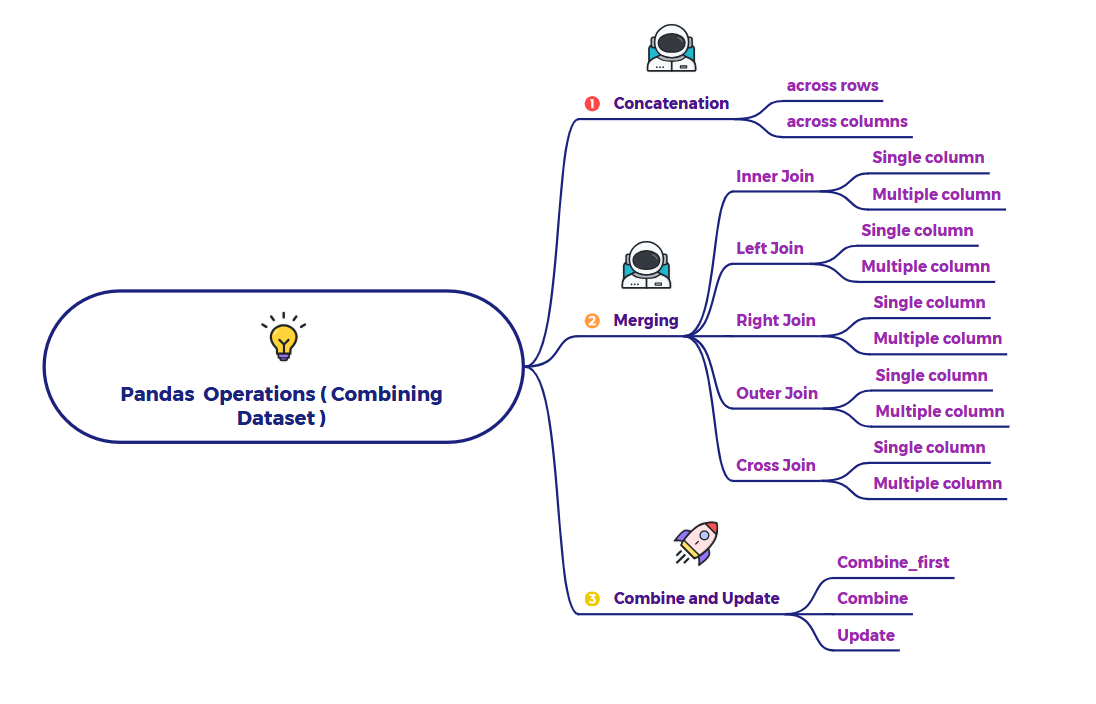

# 1. Explaining combine_first() , combine() and update() -

Here's an explanation of combine_first(), combine(), and update() in Pandas:

* df1.combine_first(other)
  * Explanation: This method prioritizes values from df1. It fills any NaN (missing) values in df1 with corresponding non-NaN values from other. If a value exists in df1 (even if NaN), it takes precedence over a NaN in other. It's particularly useful for patching holes in a primary DataFrame with data from a secondary one.

* df1.combine(df2, func)
  * Explanation: This method combines two DataFrames element-wise by applying a user-defined function (func) to each pair of corresponding values from df1 and df2. It offers fine-grained control over how overlapping non-NaN values are combined, and also provides parameters to explicitly handle NaNs before applying the function.

* df1.update(other)
  * Explanation: This method modifies df1 in place (it doesn't return a new DataFrame). It updates the values in df1 with non-NaN values from other at matching index and column labels. It's often used when you have a primary DataFrame and a smaller DataFrame with newer or corrected data that you want to use to overwrite existing values.

# 2. Implementation of combine_first()

combine_first in Pandas is used to fill missing values (NaN or null) in one DataFrame with values from another DataFrame, based on matching indices. It prioritizes the values from the first DataFrame.

1. How it Works

* Matching Indices: It aligns the DataFrames based on their index (row labels).

2. Filling Missing Values: For each element in the first DataFrame:

* If the element is not NaN, it's kept as it is.
* If the element is NaN, it's replaced with the corresponding element from the second DataFrame (if it's not NaN).

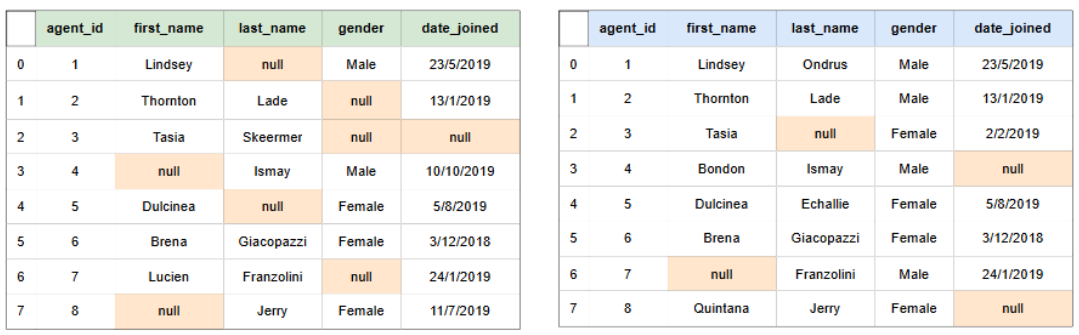

### A. Create the sample datasets

In [2]:
import pandas as pd
import numpy as np

# DataFrame df_a
A = {
    'agent_id': [1, 2, 3, 4, 5, 6, 7, 8],
    'first_name': ['Lindsey', 'Thornton', 'Tasia', np.nan, 'Dulcinea', 'Brena', 'Lucien', np.nan],
    'last_name': [np.nan, 'Lade', 'Skeermer', 'Ismay', np.nan, 'Giacopazzi', 'Franzolini', 'Jerry'],
    'gender': ['Male', np.nan, np.nan, 'Male', 'Female', 'Female', np.nan, 'Female'],
    'date_joined': ['23/5/2019', '13/1/2019', np.nan, '10/10/2019', '5/8/2019', '3/12/2018', '24/1/2019', '11/7/2019']
}
df_a = pd.DataFrame(A)

# DataFrame df_b
B = {
    'agent_id': [1, 2, 3, 4, 5, 6, 7, 8],
    'first_name': ['Lindsey', 'Thornton', 'Tasia', 'Bondon', 'Dulcinea', 'Brena', np.nan, 'Quintana'],
    'last_name': ['Ondrus', 'Lade', np.nan, 'Ismay', 'Echallie', 'Giacopazzi', 'Franzolini', 'Jerry'],
    'gender': ['Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'date_joined': ['23/5/2019', '13/1/2019', '2/2/2019', np.nan, '5/8/2019', '3/12/2018', '24/1/2019', np.nan]
}
df_b = pd.DataFrame(B)

In [4]:
# df_a dataframe

df_a

,agent_id,first_name,last_name,gender,date_joined
0,1,Lindsey,NaN,Male,23/5/2019
1,2,Thornton,Lade,NaN,13/1/2019
2,3,Tasia,Skeermer,NaN,NaN
3,4,NaN,Ismay,Male,10/10/2019
4,5,Dulcinea,NaN,Female,5/8/2019
5,6,Brena,Giacopazzi,Female,3/12/2018
6,7,Lucien,Franzolini,NaN,24/1/2019
7,8,NaN,Jerry,Female,11/7/2019


In [5]:
# df_b dataframe

df_b

,agent_id,first_name,last_name,gender,date_joined
0,1,Lindsey,Ondrus,Male,23/5/2019
1,2,Thornton,Lade,Male,13/1/2019
2,3,Tasia,NaN,Female,2/2/2019
3,4,Bondon,Ismay,Male,NaN
4,5,Dulcinea,Echallie,Female,5/8/2019
5,6,Brena,Giacopazzi,Female,3/12/2018
6,7,NaN,Franzolini,Male,24/1/2019
7,8,Quintana,Jerry,Female,NaN


### B. Implement combine_first()

In [6]:
df_combi = df_a.combine_first(df_b)
df_combi

,agent_id,first_name,last_name,gender,date_joined
0,1,Lindsey,Ondrus,Male,23/5/2019
1,2,Thornton,Lade,Male,13/1/2019
2,3,Tasia,Skeermer,Female,2/2/2019
3,4,Bondon,Ismay,Male,10/10/2019
4,5,Dulcinea,Echallie,Female,5/8/2019
5,6,Brena,Giacopazzi,Female,3/12/2018
6,7,Lucien,Franzolini,Male,24/1/2019
7,8,Quintana,Jerry,Female,11/7/2019


In [7]:
# Row 3, 'first_name': df_a was NaN, df_b was 'Bondon' -> 'Bondon'
# Row 4, 'last_name': df_a was NaN, df_b was 'Echallie' -> 'Echallie'
# Row 1, 'gender': df_a was NaN, df_b was 'Male' -> 'Male'
# Row 2, 'gender': df_a was NaN, df_b was 'Female' -> 'Female'
# Row 6, 'gender': df_a was NaN, df_b was 'Male' -> 'Male'
# Row 2, 'date_joined': df_a was NaN, df_b was '2/2/2019' -> '2/2/2019'
# Row 7, 'first_name': df_a was 'Lucien', df_b was NaN -> 'Lucien' (df_a had value)
# Row 7, 'last_name': df_a was 'Franzolini', df_b was 'Franzolini' -> 'Franzolini' (df_a had value)
# Row 7, 'date_joined': df_a was '24/1/2019', df_b was '24/1/2019' -> '24/1/2019' (df_a had value)
# Row 7, 'first_name': df_a was NaN, df_b was 'Quintana' -> 'Quintana'
# Row 7, 'date_joined': df_a was '11/7/2019', df_b was NaN -> '11/7/2019'

# 3. Implementation of combine() -


combine in Pandas is a powerful function that allows you to apply a custom function to combine elements from two DataFrames based on their indices. It gives you fine-grained control over how the values are combined.

How it Works

* Matching Indices: It aligns the DataFrames based on their index (row labels).
* Applying a Custom Function: It applies a user-defined function to corresponding elements from both DataFrames.
* Returning a Result: The function should return a single value that will be placed in the resulting DataFrame.

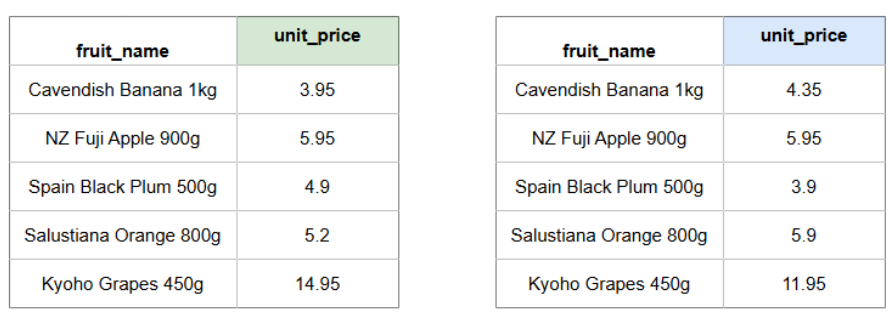

Summary

Combine is like having a tool that lets you compare two lists (or columns) side by side and apply a custom rule (your function) to decide how to combine the corresponding items. It's very flexible and allows you to perform complex comparisons and transformations.

### A. Create the dataset

In [35]:
import pandas as pd
import numpy as np


# DataFrame df_store_a: Represents product prices in Store A

data_a = {
    'fruit_name': ['Cavendish Banana 1kg', 'NZ Fuji Apple 900g', 'Spain Black Plum 500g', 'Salustiana Orange 800g', 'Kyoho Grapes 450g', 'Red Globe Grapes 500g', 'Honey Gold Mango'],
    'unit_price': [3.95, 5.95, 4.9, 5.2, np.nan, 8.50, 6.75] # Added NaN for Kyoho Grapes
}
df_store_a = pd.DataFrame(data_a)

# DataFrame df_store_b: Represents product prices in Store B (could have different values or NaNs)

data_b = {
    'fruit_name': ['Cavendish Banana 1kg', 'NZ Fuji Apple 900g', 'Spain Black Plum 500g', 'Salustiana Orange 800g', 'Kyoho Grapes 450g', 'Red Globe Grapes 500g', 'Pink Lady Apple'],
    'unit_price': [4.35, 5.95, np.nan, 5.9, 11.95, np.nan, 7.50] # Added NaN for Spain Black Plum, Red Globe Grapes
}
df_store_b = pd.DataFrame(data_b)


In [36]:
# --- Prepare DataFrames for combine: Set 'fruit_name' as index ---

# This step is crucial for `combine` to align elements correctly across DataFrames.

df_store_a_indexed = df_store_a.set_index('fruit_name')
df_store_b_indexed = df_store_b.set_index('fruit_name')

In [37]:
# visualize dataframe df_store_a_indexed

df_store_a_indexed

,unit_price
fruit_name,
Cavendish Banana 1kg,3.95
NZ Fuji Apple 900g,5.95
Spain Black Plum 500g,4.90
Salustiana Orange 800g,5.20
Kyoho Grapes 450g,NaN
Red Globe Grapes 500g,8.50
Honey Gold Mango,6.75


In [38]:
# visualize dataframe df_store_b_indexed

df_store_b_indexed

,unit_price
fruit_name,
Cavendish Banana 1kg,4.35
NZ Fuji Apple 900g,5.95
Spain Black Plum 500g,NaN
Salustiana Orange 800g,5.90
Kyoho Grapes 450g,11.95
Red Globe Grapes 500g,NaN
Pink Lady Apple,7.50


In [39]:
# --- Create a copy of df_store_a_indexed to add new combined columns ---

df_combined_results = df_store_a_indexed.copy()
df_combined_results

,unit_price
fruit_name,
Cavendish Banana 1kg,3.95
NZ Fuji Apple 900g,5.95
Spain Black Plum 500g,4.90
Salustiana Orange 800g,5.20
Kyoho Grapes 450g,NaN
Red Globe Grapes 500g,8.50
Honey Gold Mango,6.75


### B. Define the necessary utility function

* Calculates the average of two prices.
* Calculates the difference (price_a - price_b).
* Compares two prices and returns a descriptive message.

In [40]:
# 1. Custom function to calculate the average price

def calculate_average_price(price_a, price_b):
    """
    Calculates the average of two prices.
    If one is NaN, it returns the non-NaN value.
    If both are NaN, it returns NaN.
    """
    if pd.isna(price_a) and pd.isna(price_b):
        return np.nan
    elif pd.isna(price_a):
        return price_b
    elif pd.isna(price_b):
        return price_a
    else:
        return (price_a + price_b) / 2

In [41]:
# 2. Custom function to calculate the difference in prices

def calculate_difference(price_a, price_b):
    """
    Calculates the difference (price_a - price_b).
    Returns NaN if either price is NaN.
    """
    if pd.isna(price_a) or pd.isna(price_b):
        return np.nan
    else:
        return price_a - price_b

In [42]:
# 3. Custom function to compare prices and return a message

def compare_prices(price_a, price_b):
    """
    Compares two prices and returns a descriptive message.
    Handles NaN by returning a specific message.
    """
    if pd.isna(price_a) or pd.isna(price_b):
        return "Price comparison N/A (missing data)"
    elif price_a < price_b:
        return f"Price increased from {price_a:.2f} to {price_b:.2f}"
    elif price_a > price_b:
        return f"Price decreased from {price_a:.2f} to {price_b:.2f}"
    else:
        return f"Price remains the same: {price_a:.2f}"


### C. Execute combine() to find the higher price

In [43]:
# Combine to find the higher price (using np.maximum)
# np.maximum handles NaNs by keeping the non-NaN value if one is NaN, otherwise NaN if both are NaN.

df_combined_results['unit_price_max'] = df_store_a_indexed['unit_price'].combine(
    df_store_b_indexed['unit_price'],
    func=np.maximum
)
df_combined_results

,unit_price,unit_price_max
fruit_name,,
Cavendish Banana 1kg,3.95,4.35
NZ Fuji Apple 900g,5.95,5.95
Spain Black Plum 500g,4.90,NaN
Salustiana Orange 800g,5.20,5.90
Kyoho Grapes 450g,NaN,NaN
Red Globe Grapes 500g,8.50,NaN
Honey Gold Mango,6.75,NaN


### D. Execute combine() to find the lower price

In [44]:
# Combine to find the lower price (using np.minimum)
# np.minimum handles NaNs similarly.

df_combined_results['unit_price_min'] = df_store_a_indexed['unit_price'].combine(
    df_store_b_indexed['unit_price'],
    func=np.minimum
)

df_combined_results

,unit_price,unit_price_max,unit_price_min
fruit_name,,,
Cavendish Banana 1kg,3.95,4.35,3.95
NZ Fuji Apple 900g,5.95,5.95,5.95
Spain Black Plum 500g,4.90,NaN,NaN
Salustiana Orange 800g,5.20,5.90,5.20
Kyoho Grapes 450g,NaN,NaN,NaN
Red Globe Grapes 500g,8.50,NaN,NaN
Honey Gold Mango,6.75,NaN,NaN


### E. Execute combine() to calculate the average price (using custom function)

In [45]:
# Combine to calculate the average price (using custom function)

df_combined_results['unit_price_avg'] = df_store_a_indexed['unit_price'].combine(
    df_store_b_indexed['unit_price'],
    func=calculate_average_price
)

df_combined_results

,unit_price,unit_price_max,unit_price_min,unit_price_avg
fruit_name,,,,
Cavendish Banana 1kg,3.95,4.35,3.95,4.15
NZ Fuji Apple 900g,5.95,5.95,5.95,5.95
Spain Black Plum 500g,4.90,NaN,NaN,4.90
Salustiana Orange 800g,5.20,5.90,5.20,5.55
Kyoho Grapes 450g,NaN,NaN,NaN,11.95
Red Globe Grapes 500g,8.50,NaN,NaN,8.50
Honey Gold Mango,6.75,NaN,NaN,6.75


### F. Execute combine() to calculate the difference in prices (using custom function)

In [46]:
# Combine to calculate the difference in prices (using custom function)

df_combined_results['unit_price_diff_A_minus_B'] = df_store_a_indexed['unit_price'].combine(
    df_store_b_indexed['unit_price'],
    func=calculate_difference
)

df_combined_results

,unit_price,unit_price_max,unit_price_min,unit_price_avg,unit_price_diff_A_minus_B
fruit_name,,,,,
Cavendish Banana 1kg,3.95,4.35,3.95,4.15,-0.4
NZ Fuji Apple 900g,5.95,5.95,5.95,5.95,0.0
Spain Black Plum 500g,4.90,NaN,NaN,4.90,NaN
Salustiana Orange 800g,5.20,5.90,5.20,5.55,-0.7
Kyoho Grapes 450g,NaN,NaN,NaN,11.95,NaN
Red Globe Grapes 500g,8.50,NaN,NaN,8.50,NaN
Honey Gold Mango,6.75,NaN,NaN,6.75,NaN


### G. Execute combine() to compare prices and return a message (using custom function)

In [47]:
# Combine to compare prices and return a message (using custom function)
df_combined_results['price_comparison_status'] = df_store_a_indexed['unit_price'].combine(
    df_store_b_indexed['unit_price'],
    func=compare_prices
)

df_combined_results

,unit_price,unit_price_max,unit_price_min,unit_price_avg,unit_price_diff_A_minus_B,price_comparison_status
fruit_name,,,,,,
Cavendish Banana 1kg,3.95,4.35,3.95,4.15,-0.4,Price increased from 3.95 to 4.35
NZ Fuji Apple 900g,5.95,5.95,5.95,5.95,0.0,Price remains the same: 5.95
Spain Black Plum 500g,4.90,NaN,NaN,4.90,NaN,Price comparison N/A (missing data)
Salustiana Orange 800g,5.20,5.90,5.20,5.55,-0.7,Price increased from 5.20 to 5.90
Kyoho Grapes 450g,NaN,NaN,NaN,11.95,NaN,Price comparison N/A (missing data)
Red Globe Grapes 500g,8.50,NaN,NaN,8.50,NaN,Price comparison N/A (missing data)
Honey Gold Mango,6.75,NaN,NaN,6.75,NaN,Price comparison N/A (missing data)


### H. Final Combined DataFrame with all new columns (retaining structure)

In [48]:
print("\n--- Final Combined DataFrame with all new columns (retaining structure) ---")
df_combined_results


--- Final Combined DataFrame with all new columns (retaining structure) ---


,unit_price,unit_price_max,unit_price_min,unit_price_avg,unit_price_diff_A_minus_B,price_comparison_status
fruit_name,,,,,,
Cavendish Banana 1kg,3.95,4.35,3.95,4.15,-0.4,Price increased from 3.95 to 4.35
NZ Fuji Apple 900g,5.95,5.95,5.95,5.95,0.0,Price remains the same: 5.95
Spain Black Plum 500g,4.90,NaN,NaN,4.90,NaN,Price comparison N/A (missing data)
Salustiana Orange 800g,5.20,5.90,5.20,5.55,-0.7,Price increased from 5.20 to 5.90
Kyoho Grapes 450g,NaN,NaN,NaN,11.95,NaN,Price comparison N/A (missing data)
Red Globe Grapes 500g,8.50,NaN,NaN,8.50,NaN,Price comparison N/A (missing data)
Honey Gold Mango,6.75,NaN,NaN,6.75,NaN,Price comparison N/A (missing data)


### I. Optional: Reset index if 'fruit_name' is no longer needed as index

In [49]:
# Optional: Reset index if 'fruit_name' is no longer needed as index

df_final_reset_index = df_combined_results.reset_index()

df_final_reset_index

,fruit_name,unit_price,unit_price_max,unit_price_min,unit_price_avg,unit_price_diff_A_minus_B,price_comparison_status
0,Cavendish Banana 1kg,3.95,4.35,3.95,4.15,-0.4,Price increased from 3.95 to 4.35
1,NZ Fuji Apple 900g,5.95,5.95,5.95,5.95,0.0,Price remains the same: 5.95
2,Spain Black Plum 500g,4.90,NaN,NaN,4.90,NaN,Price comparison N/A (missing data)
3,Salustiana Orange 800g,5.20,5.90,5.20,5.55,-0.7,Price increased from 5.20 to 5.90
4,Kyoho Grapes 450g,NaN,NaN,NaN,11.95,NaN,Price comparison N/A (missing data)
5,Red Globe Grapes 500g,8.50,NaN,NaN,8.50,NaN,Price comparison N/A (missing data)
6,Honey Gold Mango,6.75,NaN,NaN,6.75,NaN,Price comparison N/A (missing data)


# Insight

1. Combine Vs Combine_first

Summary -

* combine(): Is like having a tool that lets you compare two lists (or columns) side by side and apply a custom rule (your function) to decide how to combine the corresponding items. It's very flexible and allows you to perform complex comparisons and transformations.
* combine_first(): Is like having two "fill in the blanks" forms. You start with the first form. If there are any blank spaces (NaNs), you fill them with the corresponding information from the second form. If there's still a blank space in the second form, it remains blank.

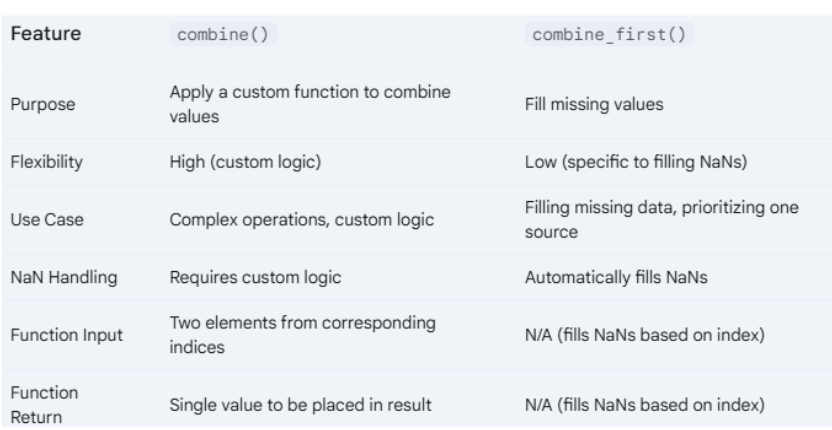

# 4. Update ()

Understanding update()

The update() function in Pandas is used to modify the values in one DataFrame with values from another DataFrame, based on matching indices. It's essentially an in-place update operation, meaning it directly changes the original DataFrame.

How it Works

* Matching Indices: It aligns the DataFrames based on their index (row labels). * Overwriting Values: For each element in the first DataFrame: If the corresponding element in the second DataFrame is not NaN, the value in the first DataFrame is replaced with the value from the second DataFrame. If the corresponding element in the second DataFrame is NaN, the value in the first DataFrame is not changed.

### A. Create the sample dataset

In [55]:
# --- Sample DataFrames from df_combine_complete_example ---
# DataFrame df_store_a: Represents product prices in Store A

data_a = {
    'fruit_name': ['Cavendish Banana 1kg', 'NZ Fuji Apple 900g', 'Spain Black Plum 500g', 'Salustiana Orange 800g', 'Kyoho Grapes 450g', 'Red Globe Grapes 500g', 'Honey Gold Mango'],
    'unit_price': [3.95, 5.95, 4.9, 5.2, np.nan, 8.50, 6.75] # Added NaN for Kyoho Grapes
}
df_store_a = pd.DataFrame(data_a)

# DataFrame df_store_b: Represents product prices in Store B (updates/additional data)
data_b = {
    'fruit_name': ['Cavendish Banana 1kg', 'NZ Fuji Apple 900g', 'Spain Black Plum 500g', 'Salustiana Orange 800g', 'Kyoho Grapes 450g', 'Red Globe Grapes 500g', 'Pink Lady Apple'],
    'unit_price': [4.35, 5.95, np.nan, 5.9, 11.95, np.nan, 7.50] # Added NaN for Spain Black Plum, Red Globe Grapes
}
df_store_b = pd.DataFrame(data_b)


In [56]:
# visualize dataframe df_store_a

df_store_a

,fruit_name,unit_price
0,Cavendish Banana 1kg,3.95
1,NZ Fuji Apple 900g,5.95
2,Spain Black Plum 500g,4.90
3,Salustiana Orange 800g,5.20
4,Kyoho Grapes 450g,NaN
5,Red Globe Grapes 500g,8.50
6,Honey Gold Mango,6.75


In [57]:
# visualize dataframe df_store_b

df_store_b

,fruit_name,unit_price
0,Cavendish Banana 1kg,4.35
1,NZ Fuji Apple 900g,5.95
2,Spain Black Plum 500g,NaN
3,Salustiana Orange 800g,5.90
4,Kyoho Grapes 450g,11.95
5,Red Globe Grapes 500g,NaN
6,Pink Lady Apple,7.50


### B. Implement update()

In [58]:
# Apply update to store b

df_store_b.update(df_store_a)
df_store_b

,fruit_name,unit_price
0,Cavendish Banana 1kg,3.95
1,NZ Fuji Apple 900g,5.95
2,Spain Black Plum 500g,4.90
3,Salustiana Orange 800g,5.20
4,Kyoho Grapes 450g,11.95
5,Red Globe Grapes 500g,8.50
6,Honey Gold Mango,6.75


# Summary

when to use each of these Pandas methods :

* combine_first(): Use to fill NaNs in the primary DataFrame with non-NaN values from another, prioritizing the primary DataFrame's existing data.
* combine(): Use to apply a custom element-wise function to values from two DataFrames, defining specific logic for how they interact.
* update(): Use to modify a DataFrame in-place by overwriting its non-NaN values with corresponding non-NaN values from another DataFrame.

# COMPLETED